<a href="https://colab.research.google.com/github/Rachana-1999/Association-Rules/blob/main/Indian-Financial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [4]:
inf = pd.read_csv('/content/IndianFinancialNews.csv')
inf

,Unnamed: 0,Date,Title,Description
0,0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d...","Close to 14.6 per cent (or 35,000) of the 240,..."
1,1,"May 26, 2020, Tuesday",IDFC First Bank seniors to forgo 65% of bonus ...,"V Vaidyanathan, managing director and chief ex..."
2,2,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf...",Rana Kapoor's wife also charged with abetting ...
3,3,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ...",The bank said it was now gearing up to extend ...
4,4,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...,Net profit for the financial year ended March ...
...,...,...,...,...
42309,42309,"December 23, 2005, Friday",CanBank takes up Rs 200cr core banking project,Canara Bank will be investing Rs 200 crore in ...
42310,42310,"December 23, 2005, Friday",LaserSoft solution for CorpBank,Laser Soft Infosystems Ltd has implemented its...
42311,42311,"December 23, 2005, Friday","Insurers rattled by new ULIP definition, seek ...",Life insurers want the government to provide d...
42312,42312,"December 23, 2005, Friday",Citibank launches new home loan scheme,Citibank has launched a 5% cash back home lo...


In [5]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [6]:
inf['Description'] = inf['Description'].astype(str)

In [9]:
 import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(inf.Description))
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


["Close to 14.6 per cent (or 35,000) of the 240,000 ATMs in India are new-age recyclers, even though they have been around for only ... V Vaidyanathan, managing director and chief executive, will take 30 per cent cut in his compensation, including fixed ... Rana Kapoor's wife also charged with abetting crime The bank said it was now gearing up to extend the stimulus package announced by Finance Minister Nirmala Sitharaman to restart ... Net profit for the financial year ended March 31, 2020 (FY20), stood at Rs 337.25 crore, up marginally from Rs 325.37 crore in ...",
 'Under the scheme, the government will offer 100 per cent guarantee on loans.',
 'HDFC Bank cuts base rate by 55 bps; SBI calls ALCO meeting to take call The six-member MPC also kept policy stance unchanged at \'accommodative\' for "as long as necessary" to revive growth The central bank has increased group exposure limits of lenders from 25% to 30% Two new series will have maturities of April 2025 and April 2031. Credit 

In [10]:
df = pd.DataFrame(sentences, columns=['Description'])
df

,Description
0,"Close to 14.6 per cent (or 35,000) of the 240,..."
1,"Under the scheme, the government will offer 10..."
2,HDFC Bank cuts base rate by 55 bps; SBI calls ...
3,"The meeting was earlier scheduled on May 11, b..."
4,It may be time to link the higher deposit insu...
...,...
17555,The Maharashtra governments stamp duty ruling...
17556,Fitch has become the first to ...
17557,"While only 11.6% customers access net banking,..."
17558,ABM Amro Bank will outsource the operations of...


In [11]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [13]:
df['sentiment_value'] = df['Description'].apply(calculate_sentiment) 

In [14]:
df['word_count'] = df['Description'].str.split().apply(len)
df['word_count'].head(10) 

0     98
1     13
2     94
3     83
4     81
5     20
6     21
7    225
8     84
9    111
Name: word_count, dtype: int64

In [15]:
df

,Description,sentiment_value,word_count
0,"Close to 14.6 per cent (or 35,000) of the 240,...",-3,98
1,"Under the scheme, the government will offer 10...",1,13
2,HDFC Bank cuts base rate by 55 bps; SBI calls ...,6,94
3,"The meeting was earlier scheduled on May 11, b...",-3,83
4,It may be time to link the higher deposit insu...,1,81
...,...,...,...
17555,The Maharashtra governments stamp duty ruling...,1,55
17556,Fitch has become the first to ...,0,7
17557,"While only 11.6% customers access net banking,...",0,12
17558,ABM Amro Bank will outsource the operations of...,2,106


In [16]:
df['sentiment_value'].describe() 

count    17560.000000
mean         0.575456
std          2.683570
min        -26.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         27.000000
Name: sentiment_value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


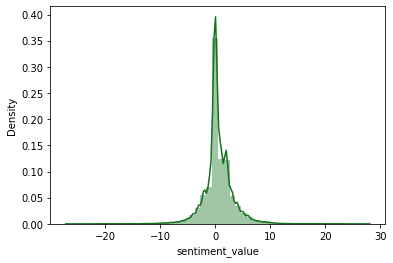

In [17]:
df['index']=range(0,len(df)) 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("dark")
sns.distplot(df['sentiment_value'],color='g')

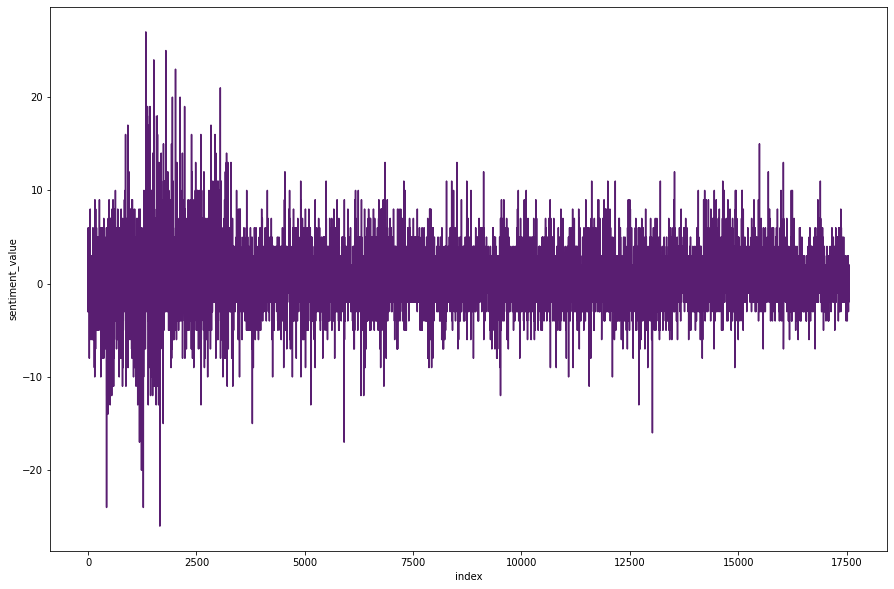

In [22]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=df,color='m') 

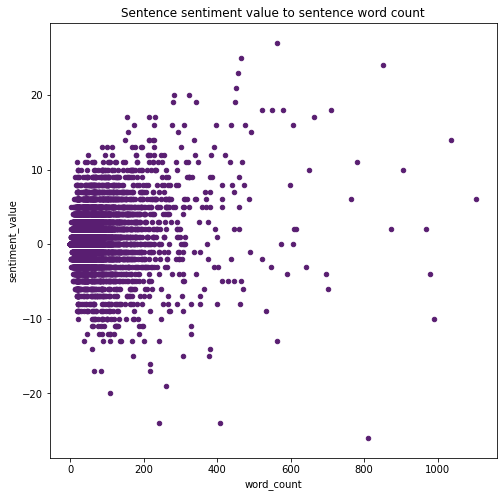

In [23]:
df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count',color='m')